In [25]:
# Install library yang dibutuhkan
!pip install numpy opencv-python scikit-learn matplotlib joblib
!pip install joblib






# Import library
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib


Train samples: 320, Validation samples: 40, Test samples: 40
Classes: ['Ahmad Mujahid' 'Ali Mubaroq' 'Alif Risaldy' 'Amirul' 'Aulia' 'Bagus'
 'Fahri' 'Fitra' 'Hajera' 'Horas' 'Imam Agil' 'Jessica Andryani'
 'Moh Faathir As shaaf' 'Moh Izhan' 'Muh Nur Alif' 'Nur Aisyah'
 'Rasya Rahmat' 'Sifa' 'Siti Hajar' 'Yunus']
Distribusi label di Train set: Counter({np.int64(13): 16, np.int64(19): 16, np.int64(18): 16, np.int64(10): 16, np.int64(5): 16, np.int64(12): 16, np.int64(6): 16, np.int64(16): 16, np.int64(3): 16, np.int64(9): 16, np.int64(4): 16, np.int64(8): 16, np.int64(15): 16, np.int64(7): 16, np.int64(17): 16, np.int64(0): 16, np.int64(14): 16, np.int64(1): 16, np.int64(11): 16, np.int64(2): 16})
Distribusi label di Validation set: Counter({np.int64(1): 2, np.int64(0): 2, np.int64(19): 2, np.int64(15): 2, np.int64(6): 2, np.int64(9): 2, np.int64(5): 2, np.int64(10): 2, np.int64(2): 2, np.int64(7): 2, np.int64(18): 2, np.int64(17): 2, np.int64(14): 2, np.int64(16): 2, np.int64(11): 2, n

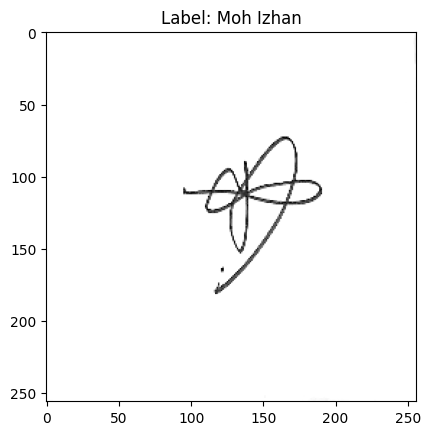

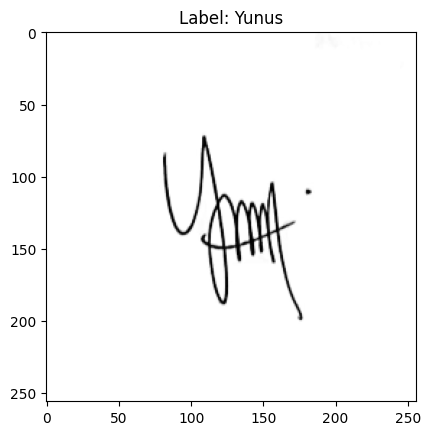

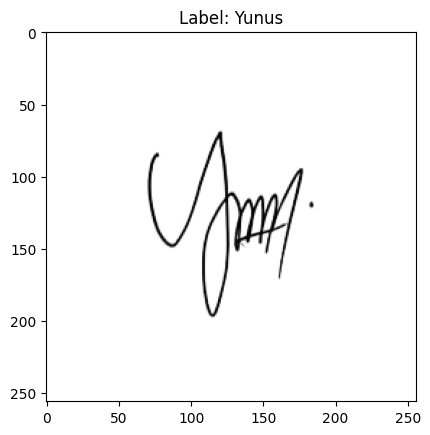

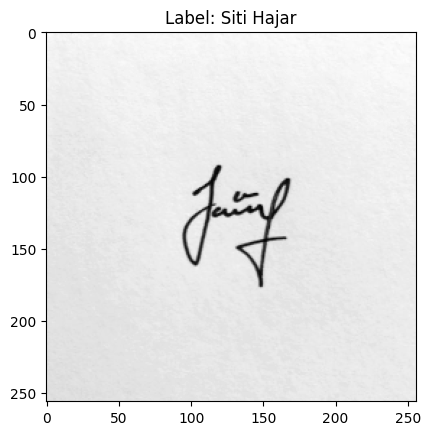

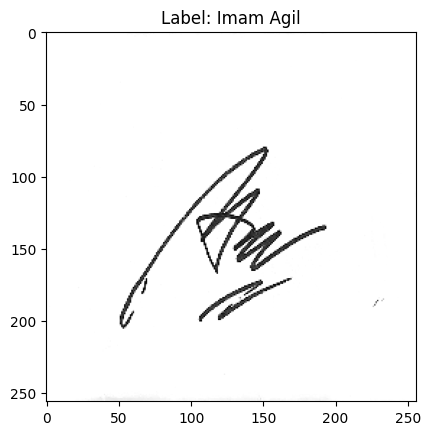

In [26]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Path ke folder dataset
dataset_dir = "Dataset Tanda Tangan"

# Data dan label
data = []
labels = []
img_size = 256  # Ukuran gambar (128x128)

# Loop untuk membaca semua gambar di folder dataset
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):  # Pastikan hanya membaca folder
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar grayscale
            if img is not None:  # Pastikan gambar berhasil dibaca
                img = cv2.resize(img, (img_size, img_size))  # Resize gambar
                data.append(img.flatten())  # Flatten gambar menjadi vektor
                labels.append(class_name)  # Gunakan nama folder sebagai label

# Konversi data ke array numpy
data = np.array(data) / 255.0  # Normalisasi nilai piksel (0-1)

# Mengubah label string menjadi angka
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)  # Ubah label string menjadi angka

# Bagi dataset menjadi Train (80%), Validation (10%), dan Test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(data, numeric_labels, test_size=0.2, random_state=42, stratify=numeric_labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Tampilkan jumlah sampel di setiap subset
print(f"Train samples: {len(X_train)}, Validation samples: {len(X_val)}, Test samples: {len(X_test)}")
print("Classes:", label_encoder.classes_)

print("Distribusi label di Train set:", Counter(y_train))
print("Distribusi label di Validation set:", Counter(y_val))
print("Distribusi label di Test set:", Counter(y_test))

for i in range(5):
    plt.imshow(X_train[i].reshape(img_size, img_size), cmap='gray')
    plt.title(f"Label: {label_encoder.inverse_transform([y_train[i]])[0]}")
    plt.show()

  # Menampilkan nama kelas


In [27]:
import joblib
# Buat model SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluasi pada data validasi
y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


# Simpan model
joblib.dump(svm_model, "svm_model.pkl")
# Simpan label encoder
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model dan label encoder telah disimpan.")



Validation Accuracy: 90.00%
Model dan label encoder telah disimpan.


Test Accuracy: 97.50%


<Figure size 1000x800 with 0 Axes>

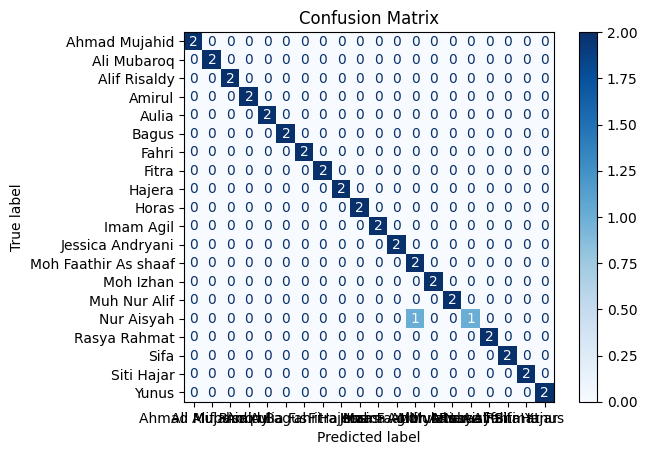

In [28]:
# Prediksi pada data test
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(labels))

# Tampilkan confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [34]:
def preprocess_image(img_path, img_size=256):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (img_size, img_size))
    img_flattened = img_resized.flatten() / 255.0  # Normalisasi
    return img_flattened.reshape(1, -1)  # Reshape untuk input model

# Memuat model dan label encoder yang telah dilatih sebelumnya
svm_model = joblib.load('svm_model.pkl')  # Ganti dengan path model Anda
label_encoder = joblib.load('label_encoder.pkl')  # Ganti dengan path encoder Anda

# Path ke gambar yang ingin diuji
test_image_path = "Data_Uji.png"  # Ubah sesuai lokasi file gambar Anda

# Preprocess gambar
test_image = preprocess_image(test_image_path)

# Prediksi
predicted_label = svm_model.predict(test_image)[0]
confidence = max(svm_model.predict_proba(test_image)[0])  # Skor confidence

# Konversi label angka ke nama kelas
predicted_class = label_encoder.inverse_transform([predicted_label])[0]

# Menampilkan hasil prediksi dan confidence
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")

Predicted Class: Jessica Andryani, Confidence: 0.71
